# 机器学习的步骤
* 模型训练
* 模型评估
* 模型保存
* 模型应用

In [1]:
import numpy as np
## 导包
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

X = np.loadtxt('test_image.csv',delimiter=',')
y = np.loadtxt('test_label.csv',delimiter=',').astype(int)
Y = np.eye(10)[y]
##把数据集拆分成训练集和测试集  80%的数据训练，20%的数据测试
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=23)

model = Sequential()
model.add(Dense(30,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
## 编译模型，指定模型的训练参数
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

## 训练模型
data = model.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_test,y_test))



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 23.9345 - accuracy: 0.3007 - val_loss: 2.3168 - val_accuracy: 0.2725
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 2.2275 - accuracy: 0.2675 - val_los

63/63 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9380 - val_loss: 0.9123 - val_accuracy: 0.8965
Epoch 53/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9425 - val_loss: 0.9337 - val_accuracy: 0.8895
Epoch 54/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9409 - val_loss: 0.8955 - val_accuracy: 0.8975
Epoch 55/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9433 - val_loss: 0.9353 - val_accuracy: 0.8960
Epoch 56/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9430 - val_loss: 0.8998 - val_accuracy: 0.9020
Epoch 57/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9413 - val_loss: 0.9882 - val_accuracy: 0.8920
Epoch 58/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9385 - val_loss: 0.9497 - val_accuracy: 0.8995
Epoch 59/100
63/63 

## 模型的保存

In [5]:
model.save('mnist.h5')

## 加载模型

In [6]:
from tensorflow.keras.models import load_model
classifier = load_model('mnist.h5')  # 加载模型文件

识别的数字为:8


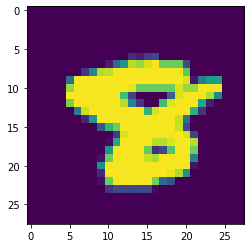

In [28]:
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
# 创建一个1到10000的随机数
index = np.random.randint(0,len(X))
plt.imshow(X[index].reshape(28,28))

number = np.argmax(classifier.predict(X[index].reshape(1,784)))
print("识别的数字为:{}".format(number))

## 模型评价

In [50]:

#导包，导入skleran科学计算库的混淆矩阵和报表包
from sklearn.metrics import classification_report,confusion_matrix

# 预测值
y_pred = classifier.predict_classes(X_test)

#真实值 
real = np.argmax(y_test,axis=1)

# 各个维度的精确度的报表
print(classification_report(real,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       207
           1       0.97      0.98      0.98       237
           2       0.94      0.89      0.92       195
           3       0.94      0.91      0.92       215
           4       0.93      0.88      0.90       188
           5       0.92      0.86      0.89       176
           6       0.93      0.92      0.93       192
           7       0.95      0.89      0.92       190
           8       0.76      0.91      0.83       200
           9       0.84      0.86      0.85       200

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [51]:
confusion_matrix(real,y_pred)

array([[200,   0,   0,   0,   0,   0,   2,   0,   5,   0],
       [  0, 233,   1,   0,   0,   0,   1,   0,   0,   2],
       [  1,   0, 174,   2,   1,   0,   3,   3,  10,   1],
       [  0,   0,   2, 195,   0,   5,   0,   0,  11,   2],
       [  0,   0,   1,   0, 165,   2,   4,   2,   3,  11],
       [  0,   1,   1,   8,   1, 151,   3,   0,  10,   1],
       [  6,   0,   1,   0,   1,   4, 177,   0,   3,   0],
       [  0,   2,   3,   0,   0,   0,   0, 170,   6,   9],
       [  2,   1,   2,   3,   0,   1,   0,   1, 182,   8],
       [  2,   2,   0,   0,   9,   1,   0,   3,  10, 173]], dtype=int64)

In [55]:
## 把预测错误的数据都可视化出来
error_position = np.nonzero(real - y_pred)[0]

识别的数字为:2,真是的数字4


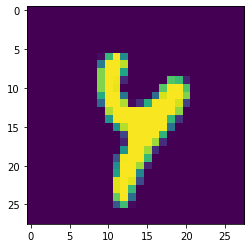

In [70]:
error_index = np.random.randint(0,len(error_position))


plt.imshow(X_test[error_position[error_index]].reshape(28,28))

number = np.argmax(classifier.predict(X_test[error_position[error_index]].reshape(1,784)))
print("识别的数字为:{},真是的数字{}".format(number,np.argmax(y_test[error_position[error_index]])))